#Topic Modeling

In [ ]:
#Things for Topic Modeling
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install uvicorn
!pip install python-multipart
!pip install kaleido

!pip install funcy
!pip install tzdata
!pip install fastapi
!pip install --no-deps pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.7 MB/s eta 0:00:00


In [ ]:
!pip install gensim

In [ ]:
#!pip install pyLDAvis

In [ ]:
import re
import numpy as np
from pprint import pprint
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
# spacy for lemmatization
import spacy

In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install nlplot

import nlplot
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.9/967.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.3 MB/s eta 0:00:00


In [ ]:
# data = [['tom', 10], ['nick', 15], ['juli', 14]]
# df = pd.DataFrame(data, columns=['Name', 'Age'])
# print(df)

#Data Loader

In [ ]:
def load(path):
  data = pd.read_csv(path)
  return data

#Read Data

In [ ]:
!unzip /content/Articles.zip

Archive:  /content/Articles.zip
  inflating: Articles/Bahamas_Ministry of Foreign Affairs Records_Article.csv  
  inflating: Articles/Bahamas_Office of the Prime Minister_Article.csv  
  inflating: Articles/Barbados_Prime Minister Speeches_Article.csv  
  inflating: Articles/Belize_Government of Belize Press Office Speeches_Article.csv  
  inflating: Articles/Guyana_National Assembly_Article.csv  
  inflating: Articles/Guyana_President Messages and Speeches_Article.csv  
  inflating: Articles/Jamaica_Ministry of Foreign Affairs and Foreign Trade_Article.csv  
  inflating: Articles/Jamaica_Prime Minister Speeches_Article.csv  
  inflating: Articles/Trinidad y Tobago_Judiciary speeches_Article.csv  
  inflating: Articles/Trinidad y Tobago_President Messages and Speeches_Article.csv  
  inflating: Articles/Trinidad y Tobago_Prime Minister Speeches_Article.csv  
  inflating: Articles/Trinidad y Tobago_United National Congress speeches_Article.csv  


In [ ]:
engspch=pd.read_csv(f'/content/EngSpeech.csv')
#engspch.head(5)

##Process Text for Analysis (Tester/Example)

In [ ]:
from google.colab import files
from collections.abc import Iterable
# Import the wordcloud library
from wordcloud import WordCloud
import os
from nltk.corpus import stopwords

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence).encode('utf-8'), deacc=True))  # deacc=True removes punctuations

In [ ]:
def flatten(xs):
    for x in xs:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# counter=0

for dta in os.listdir('/content/Articles'):
  dataset=pd.read_csv(f'/content/Articles/{dta}')
  country=dta.split("_")[0]
  filebot=dta.split(".")[0]
  if not os.path.exists(f'/content/{country}_WordCloud'):
    !mkdir '{country}_WordCloud'
    !mkdir '{country}_WordCloud_After'
  dataset.rename(columns={'Main Text': 'MainText'}, inplace=True)
  keywords = ["migration","immigrant","immigration","migrant","expat","asylum","refugee","returnee","Migration","Immigrant","Immigration","Migrant","Expat","Asylum","Refugee","Returnee"]
  dataset.dropna(subset=["MainText"], inplace=True)
  matches_df = dataset.loc[dataset.MainText.apply(lambda x: any(k for k in keywords if k in x))]
  if matches_df.empty:
    break
  # Convert Text column to list
  data = matches_df.MainText.values.tolist()

  # Remove Websites
  data = [re.sub(r'http\S+', '', comment) for comment in data]

  # Remove new line characters
  data = [re.sub('\s+', ' ', comment) for comment in data]

  # Remove single quotes
  data = [re.sub("\'"," ", comment) for comment in data]

  data_words = list(sent_to_words(data))

  flat_dat=flatten(data_words)

  # Join the different processed titles together.
  long_string = ','.join(flat_dat)
  # Create a WordCloud object
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
  # Generate a word cloud
  cloud=wordcloud.generate(long_string)
  # Visualize the word cloud
  wordcloud.to_image()

  cloud.to_file(f'/content/{country}_WordCloud/{filebot}.png')

  plt.show
  # counter+=1
  # if counter==5:
  #   break
  stop_words = stopwords.words('english')
  stop_words.extend([country.lower(), 'will'])
  if country=="Trinidad y Tobago":
    stop_words.extend(['trinidad', 'tobago'])

  # Build the bigram and trigram models
  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  # Remove Stop Words
  data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words_nostops)

  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
  # python3 -m spacy download en
  nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

  # Join the different processed titles together.
  flat_dat=flatten(data_lemmatized)
  long_string = ','.join(flat_dat)
  # Create a WordCloud object
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
  # Generate a word cloud
  wordcloud.generate(long_string)
  # Visualize the word cloud
  wordcloud.to_image()
  cloud.to_file(f'/content/{country}_WordCloud_After/{filebot}.png')

In [ ]:
countries=["Bahamas","Barbados","Guyana","Jamaica","Trinidad y Tobago"]
for country in countries:
  !zip -r '/content/{country}_WordCloud_After.zip' '/content/{country}_WordCloud_After'
  files.download(f"/content/{country}_WordCloud_After.zip")

  adding: content/Bahamas_WordCloud_After/ (stored 0%)
  adding: content/Bahamas_WordCloud_After/Bahamas_Office of the Prime Minister_Article.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/Barbados_WordCloud_After/ (stored 0%)
  adding: content/Barbados_WordCloud_After/Barbados_Prime Minister Speeches_Article.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/Guyana_WordCloud_After/ (stored 0%)
  adding: content/Guyana_WordCloud_After/Guyana_National Assembly_Article.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/Jamaica_WordCloud_After/ (stored 0%)
  adding: content/Jamaica_WordCloud_After/Jamaica_Prime Minister Speeches_Article.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/Trinidad y Tobago_WordCloud_After/ (stored 0%)
  adding: content/Trinidad y Tobago_WordCloud_After/Trinidad y Tobago_President Messages and Speeches_Article.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Remove Stopwords, Make Bigrams and Lemmatize

###Exploration Once More

###Create Dictionary and Corpus

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

NameError: name 'data_lemmatized' is not defined

In [ ]:
# Look at Human readable format of corpus (term-frequency) to check for
# words that should be added to stopwords
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abide', 1),
  ('able', 1),
  ('abuse', 2),
  ('accede', 1),
  ('accelerate', 1),
  ('acceptable', 1),
  ('access', 3),
  ('accessible', 1),
  ('accession', 2),
  ('accordance', 1),
  ('achievement', 1),
  ('act', 12),
  ('action', 4),
  ('activity', 1),
  ('adaptation', 1),
  ('add', 1),
  ('addition', 1),
  ('additional', 2),
  ('address', 8),
  ('adequate', 1),
  ('administer', 1),
  ('administration', 1),
  ('administrative', 3),
  ('adopt', 2),
  ('adoption', 2),
  ('advice', 1),
  ('aerodrome', 2),
  ('affair', 2),
  ('affect', 1),
  ('affordable', 1),
  ('agency', 1),
  ('agenda', 4),
  ('agreement', 5),
  ('agricultural', 5),
  ('agriculture', 1),
  ('agro', 3),
  ('aim', 12),
  ('aircraft', 1),
  ('align', 3),
  ('allow', 4),
  ('almost', 1),
  ('already', 2),
  ('also', 15),
  ('alternative', 1),
  ('altogether', 1),
  ('amend', 1),
  ('amendment', 3),
  ('amendment_bill', 4),
  ('amount', 1),
  ('anchor', 1),
  ('animal', 1),
  ('anti', 2),
  ('antibiotic', 2),
  ('appell

Add the necessary stopwords and redo again!

###Build and View Topic Model

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    perplexity_values = []
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        perplexity_values.append(model.log_perplexity(corpus))
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values, perplexity_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=50, step=3)

Text(0.5, 1.0, 'Coherence score for NYC Thread Topic Modeling')

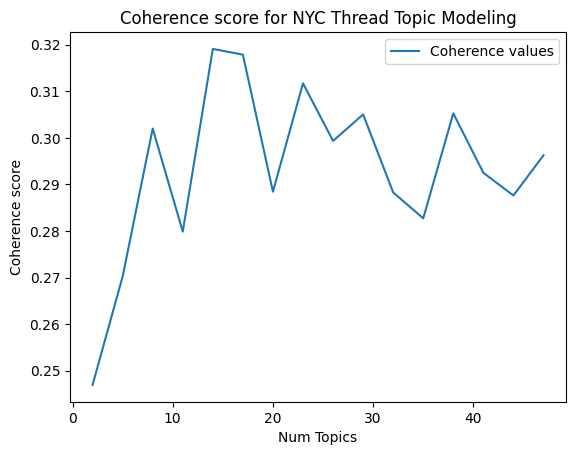

In [ ]:
# Show graph
limit=50; start=2; step=3;
x = range(start, limit, step)
figure,ax=plt.subplots()
ax.plot(x, coherence_values,label="Coherence values")
ax.set_xlabel("Num Topics")
ax.set_ylabel("Coherence score")
ax.legend(loc='best')
ax.set_title("Coherence score for NYC Thread Topic Modeling")
#plt.savefig('/content/drive/MyDrive/DSMA/dsma_nyc_coherence.png')

In [ ]:
#figure.savefig('/content/drive/MyDrive/DSMA/dsma_nyc_coherence2.png', dpi=300)

In [ ]:
# Print the coherence scores
for m, cv, pv in zip(x, coherence_values, perplexity_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4), " has Perplexity Value of", round(pv, 4))

Num Topics = 2  has Coherence Value of 0.247  has Perplexity Value of -7.79
Num Topics = 5  has Coherence Value of 0.2702  has Perplexity Value of -7.8141
Num Topics = 8  has Coherence Value of 0.302  has Perplexity Value of -7.8347
Num Topics = 11  has Coherence Value of 0.2799  has Perplexity Value of -7.8769
Num Topics = 14  has Coherence Value of 0.3191  has Perplexity Value of -7.8653
Num Topics = 17  has Coherence Value of 0.3179  has Perplexity Value of -7.902
Num Topics = 20  has Coherence Value of 0.2884  has Perplexity Value of -7.938
Num Topics = 23  has Coherence Value of 0.3117  has Perplexity Value of -8.1138
Num Topics = 26  has Coherence Value of 0.2993  has Perplexity Value of -8.1117
Num Topics = 29  has Coherence Value of 0.305  has Perplexity Value of -8.4933
Num Topics = 32  has Coherence Value of 0.2883  has Perplexity Value of -8.6512
Num Topics = 35  has Coherence Value of 0.2827  has Perplexity Value of -8.8014
Num Topics = 38  has Coherence Value of 0.3053  ha

In [ ]:
# Select the model and print the topics
optimal_model = model_list[12]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(6,
  '0.001*"year" + 0.001*"government" + 0.000*"people" + 0.000*"budget" + '
  '0.000*"school" + 0.000*"also" + 0.000*"programme" + 0.000*"work" + '
  '0.000*"make" + 0.000*"continue"'),
 (25,
  '0.001*"say" + 0.000*"year" + 0.000*"government" + 0.000*"country" + '
  '0.000*"people" + 0.000*"budget" + 0.000*"make" + 0.000*"give" + '
  '0.000*"know" + 0.000*"go"'),
 (26,
  '0.000*"year" + 0.000*"people" + 0.000*"make" + 0.000*"say" + '
  '0.000*"government" + 0.000*"give" + 0.000*"work" + 0.000*"time" + '
  '0.000*"service" + 0.000*"national"'),
 (31,
  '0.001*"say" + 0.000*"budget" + 0.000*"year" + 0.000*"government" + '
  '0.000*"make" + 0.000*"country" + 0.000*"people" + 0.000*"also" + '
  '0.000*"work" + 0.000*"need"'),
 (17,
  '0.001*"year" + 0.001*"say" + 0.001*"government" + 0.001*"people" + '
  '0.001*"budget" + 0.000*"give" + 0.000*"also" + 0.000*"service" + '
  '0.000*"development" + 0.000*"national"'),
 (23,
  '0.001*"year" + 0.001*"people" + 0.001*"say" + 0.001*"governmen

In [ ]:
# Build LDA model with optimal topics to make sure it is same as above
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=38,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(25,
  '0.001*"say" + 0.000*"year" + 0.000*"government" + 0.000*"country" + '
  '0.000*"people" + 0.000*"budget" + 0.000*"make" + 0.000*"give" + '
  '0.000*"know" + 0.000*"go"'),
 (6,
  '0.001*"year" + 0.001*"government" + 0.000*"people" + 0.000*"budget" + '
  '0.000*"school" + 0.000*"also" + 0.000*"programme" + 0.000*"work" + '
  '0.000*"make" + 0.000*"continue"'),
 (13,
  '0.000*"government" + 0.000*"people" + 0.000*"country" + 0.000*"say" + '
  '0.000*"budget" + 0.000*"work" + 0.000*"year" + 0.000*"need" + '
  '0.000*"development" + 0.000*"school"'),
 (26,
  '0.000*"year" + 0.000*"people" + 0.000*"make" + 0.000*"say" + '
  '0.000*"government" + 0.000*"give" + 0.000*"work" + 0.000*"time" + '
  '0.000*"service" + 0.000*"national"'),
 (37,
  '0.000*"government" + 0.000*"year" + 0.000*"people" + 0.000*"say" + '
  '0.000*"service" + 0.000*"public" + 0.000*"school" + 0.000*"national" + '
  '0.000*"budget" + 0.000*"country"'),
 (31,
  '0.001*"say" + 0.000*"budget" + 0.000*"year" + 0.000*"

Infer the topic from keywords

###Visualization

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word) #HERE WE NEEDED TO CHANGE gensim TO gensim_models
vis

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
#Put data_words into a df to use in nlplot
df=pd.DataFrame()
df['text']=pd.Series(data_words)
df.head()

,text
0,"[speech, delivered, at, st, sitting, of, the, ..."
1,"[speech, delivered, at, rd, sitting, eleventh,..."
2,"[speech, delivered, at, th, sitting, th, parli..."
3,"[speech, delivered, at, th, sitting, tenth, pa..."
4,"[speech, delivered, at, nd, sitting, tenth, pa..."


In [ ]:
npt = nlplot.NLPlot(df, target_col='text')

In [ ]:
fig_bigram = npt.bar_ngram(
    title='Bi-gram for NYC Ban Thread',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=38,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stop_words,
    verbose=False,
    save=False,
)
fig_bigram.show()

In [ ]:
fig_trigram = npt.bar_ngram(
    title='Tri-gram for NYC Ban Thread',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=3,
    top_n=38,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stop_words,
    verbose=False,
    save=False,
)
fig_trigram.show()

In [ ]:
#Co-occurrence networks
npt.build_graph(stopwords=stop_words, min_edge_frequency=10)
# The number of nodes and edges to which this output is plotted.
# If this number is too large, plotting will take a long time, so adjust the [min_edge_frequency] well.
# >> node_size:70, edge_size:166
fig_co_network = npt.co_network(
    title='Co-occurrence network for NYC Thread',
    sizing=100,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=1100,
    height=700,
    save=False
)
#iplot(fig_co_network, filename='/content/drive/MyDrive/DSMA/dsma_cooccurrence_network_nyc.png')

node_size:424, edge_size:33023


#Sentiment and Emotion Analysis

##Setup
https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student?text=quiero+chocolate

Don't use https://huggingface.co/michellejieli/emotion_text_classifier

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="michellejieli/emotion_text_classifier")
classifier("I love this!")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

[{'label': 'joy', 'score': 0.9887555241584778}]

In [ ]:
from transformers import pipeline

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    return_all_scores=True
)

# english
distilled_student_sentiment_classifier ("I love this movie and i would watch it again and again!")
# >> [[{'label': 'positive', 'score': 0.9731044769287109},
#   {'label': 'neutral', 'score': 0.016910076141357422},
#   {'label': 'negative', 'score': 0.009985478594899178}]]

# malay
distilled_student_sentiment_classifier("Saya suka filem ini dan saya akan menontonnya lagi dan lagi!")
# [[{'label': 'positive', 'score': 0.9760093688964844},
#   {'label': 'neutral', 'score': 0.01804516464471817},
#   {'label': 'negative', 'score': 0.005945465061813593}]]

# japanese
distilled_student_sentiment_classifier("私はこの映画が大好きで、何度も見ます！")
# >> [[{'label': 'positive', 'score': 0.9342429041862488},
#   {'label': 'neutral', 'score': 0.040193185210227966},
#   {'label': 'negative', 'score': 0.025563929229974747}]]


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'positive', 'score': 0.9342429041862488},
  {'label': 'neutral', 'score': 0.040193162858486176},
  {'label': 'negative', 'score': 0.025563929229974747}]]

#Ok

In [ ]:
# counter=0

for dta in os.listdir('/content/Articles'):
  dataset=pd.read_csv(f'/content/Articles/{dta}')
  country=dta.split("_")[0]
  filebot=dta.split(".")[0]
  if not os.path.exists(f'/content/{country}_WordCloud'):
    !mkdir '{country}_Sentiments'
    !mkdir '{country}_Emotions'
    !mkdir '/content/{country}_WordCloud_After'
  dataset.rename(columns={'Main Text': 'MainText'}, inplace=True)
  keywords = ["migration","immigrant","immigration","migrant","expat","asylum","refugee","returnee","Migration","Immigrant","Immigration","Migrant","Expat","Asylum","Refugee","Returnee"]
  dataset.dropna(subset=["MainText"], inplace=True)
  matches_df = dataset.loc[dataset.MainText.apply(lambda x: any(k for k in keywords if k in x))]
  if matches_df.empty:
    break
  # Convert Text column to list
  data = matches_df.MainText.values.tolist()

  # Remove Websites
  data = [re.sub(r'http\S+', '', comment) for comment in data]

  # Remove new line characters
  data = [re.sub('\s+', ' ', comment) for comment in data]

  # Remove single quotes
  data = [re.sub("\'"," ", comment) for comment in data]

  data_words = list(sent_to_words(data))

  flat_dat=flatten(data_words)

  # Join the different processed titles together.
  long_string = ','.join(flat_dat)




  stop_words = stopwords.words('english')
  stop_words.extend([country.lower(), 'will'])
  if country=="Trinidad y Tobago":
    stop_words.extend(['trinidad', 'tobago'])

  # Build the bigram and trigram models
  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  # Remove Stop Words
  data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words_nostops)

  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
  # python3 -m spacy download en
  nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

  # Join the different processed titles together.
  flat_dat=flatten(data_lemmatized)
  long_string = ','.join(flat_dat)
  # Create a WordCloud object
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
  # Generate a word cloud
  wordcloud.generate(long_string)
  # Visualize the word cloud
  wordcloud.to_image()
  wordcloud.to_file(f'/content/{country}_WordCloud_After/{filebot}.png')

In [ ]:
def average(lst):
    return sum(lst) / len(lst)

In [ ]:
import csv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

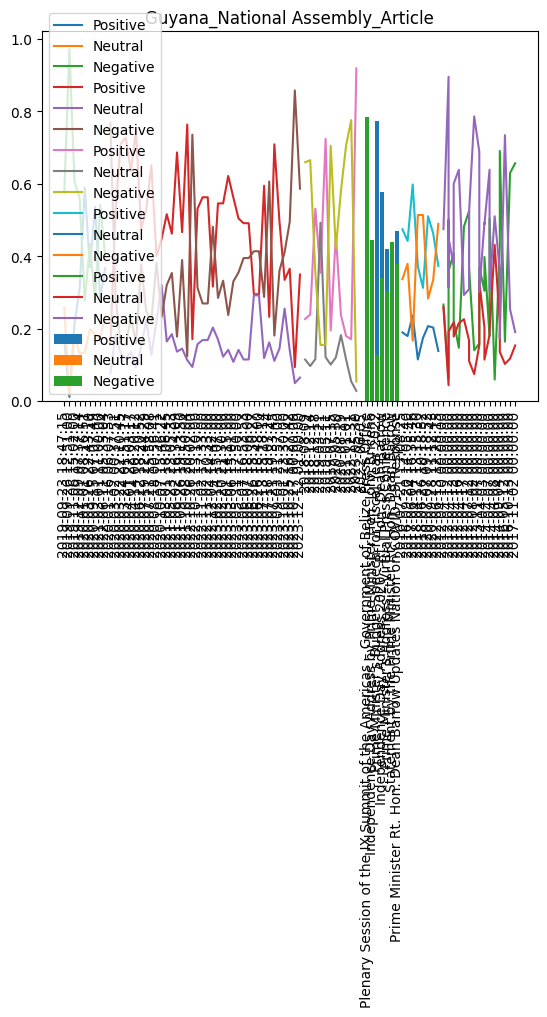

In [ ]:
for dta in os.listdir('/content/Articles'):
  dataset=pd.read_csv(f'/content/Articles/{dta}')
  country=dta.split("_")[0]
  filebot=dta.split(".")[0]
  dataset.rename(columns={'Main Text': 'MainText'}, inplace=True)
  keywords = ["migration","immigrant","immigration","migrant","expat","asylum","refugee","returnee","Migration","Immigrant","Immigration","Migrant","Expat","Asylum","Refugee","Returnee"]
  dataset.dropna(subset=["MainText"], inplace=True)
  matches_df = dataset[dataset.MainText.apply(lambda x: any(k for k in keywords if k in x))].copy()

  if not os.path.exists(f'/content/{country}_Sentiments'):
    !mkdir '{country}_Sentiments'

  if matches_df.empty:
    break

  pos=[]
  neut=[]
  neg=[]
  sents=[]
  for i in range(len(matches_df)):
    # print(i)
    text=matches_df.iloc[i]['MainText']
    sentences=[sentence + '.' for sentence in text.split('.') if any(k for k in keywords if k in sentence)]
    # print(sentences)
    # for line in sentences:
    #   distilled_student_sentiment_classifier(line)
    sentiment=distilled_student_sentiment_classifier(sentences)
    sents.append(sentiment)
    pos.append(average([list[0]['score'] for list in sentiment]))
    neut.append(average([list[1]['score'] for list in sentiment]))
    neg.append(average([list[2]['score'] for list in sentiment]))
  matches_df['Sentiment']=sents
  matches_df['Positive Sentiment Average']=pos
  matches_df['Neutral Sentiment Average']=neut
  matches_df['Negative Sentiment Average']=neg
  #if values in Date Published does not contain N/A
  df = matches_df.sort_values('Date Published', ascending=True)
  try:
    plt.plot(df['Date Published'], df['Positive Sentiment Average'], label="Positive")
    plt.plot(df['Date Published'], df['Neutral Sentiment Average'], label="Neutral")
    plt.plot(df['Date Published'], df['Negative Sentiment Average'], label="Negative")
  except:
    plt.bar(df['Title'], df['Positive Sentiment Average'], label="Positive")
    plt.bar(df['Title'], df['Neutral Sentiment Average'], label="Neutral")
    plt.bar(df['Title'], df['Negative Sentiment Average'], label="Negative")
  plt.legend()
  plt.title(filebot)
  plt.xticks(rotation='vertical')
  plt.savefig(f'/content/{country}_Sentiments/{filebot}.png')
  matches_df.to_csv(f'{filebot}_Sentiments.csv',sep=",",quotechar='"',index=False,quoting=csv.QUOTE_ALL)
  files.download(f'{filebot}_Sentiments.csv')

In [ ]:
countries=["Bahamas","Barbados","Guyana","Jamaica","Trinidad y Tobago"]
for country in countries:
  !zip -r '/content/{country}_Sentiments.zip' '/content/{country}_Sentiments'
  files.download(f"/content/{country}_Sentiments.zip")

  adding: content/Bahamas_Sentiments/ (stored 0%)
  adding: content/Bahamas_Sentiments/Bahamas_Office of the Prime Minister_Article.png (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/Barbados_Sentiments/ (stored 0%)
  adding: content/Barbados_Sentiments/Barbados_Prime Minister Speeches_Article.png (deflated 5%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/Guyana_Sentiments/ (stored 0%)
  adding: content/Guyana_Sentiments/Guyana_National Assembly_Article.png (deflated 5%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/Jamaica_Sentiments/ (stored 0%)
  adding: content/Jamaica_Sentiments/Jamaica_Prime Minister Speeches_Article.png (deflated 5%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/Trinidad y Tobago_Sentiments/ (stored 0%)
  adding: content/Trinidad y Tobago_Sentiments/Trinidad y Tobago_President Messages and Speeches_Article.png (deflated 5%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Individual

In [ ]:
matches_df

,Title,Authors,Date Published,Description,MainText,Language,URL,Sentiment,Positive Sentiment Average,Neutral Sentiment Average,Negative Sentiment Average
13,Political Leader Speech at UNC Monday Night Fo...,[],2019-05-28 20:40:54,Introduction Good night UNC family! I can feel...,Introduction\nGood night UNC family! I can fee...,en,https://unctt.org/political-leader-speech-at-u...,"[[{'label': 'positive', 'score': 0.11505226045...",0.183641,0.200119,0.616240
30,Speaking Notes of Kamla Persad-Bissessar At th...,[],2017-03-20 12:16:50,"Speaking Notes of Kamla Persad-Bissessar, SC....","Speaking Notes of\nKamla Persad-Bissessar, SC....",en,https://unctt.org/speaking-notes-of-kamla-pers...,"[[{'label': 'positive', 'score': 0.51602011919...",0.346976,0.224946,0.428078
55,PM Kamla speech at People’s Partnership 5th An...,[],2015-05-26 12:49:31,Excerpts of the Speaking Notes of The Honourab...,Excerpts of the Speaking Notes of\nThe Honoura...,en,https://unctt.org/pm-kamla-speech-at-peoples-p...,"[[{'label': 'positive', 'score': 0.41515791416...",0.415158,0.204902,0.379940
73,PM Address 25th Intercessional Meeting Heads o...,[],2014-03-10 16:24:13,Address of The Honourable Kamla Persad Bissess...,Address of The Honourable Kamla Persad Bissess...,en,https://unctt.org/pm-address-25th-intercession...,"[[{'label': 'positive', 'score': 0.22354765236...",0.223548,0.097668,0.678784
89,PM Kamla speech at the US Vice President-CARIC...,['About The Author'],2013-05-29 22:52:55,The Honourable Kamla Persad- Bissessar on the ...,The Honourable Kamla Persad- Bissessar on the ...,en,https://unctt.org/pm-kamla-speech-at-the-us-vi...,"[[{'label': 'positive', 'score': 0.76778721809...",0.577129,0.155717,0.267154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

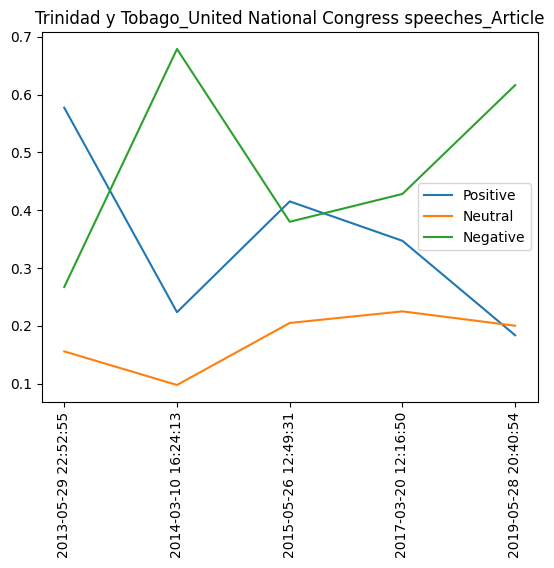

In [ ]:
dataset=pd.read_csv('/content/Articles/Trinidad y Tobago_United National Congress speeches_Article.csv')
filebot='Trinidad y Tobago_United National Congress speeches_Article'
# country=dta.split("_")[0]
# filebot=dta.split(".")[0]
dataset.rename(columns={'Main Text': 'MainText'}, inplace=True)
keywords = ["migration","immigrant","immigration","migrant","expat","asylum","refugee","returnee","Migration","Immigrant","Immigration","Migrant","Expat","Asylum","Refugee","Returnee"]
dataset.dropna(subset=["MainText"], inplace=True)
matches_df = dataset[dataset.MainText.apply(lambda x: any(k for k in keywords if k in x))].copy()

# if not os.path.exists(f'/content/{country}_Sentiments'):
#   !mkdir '{country}_Sentiments'



pos=[]
neut=[]
neg=[]
sents=[]
for i in range(len(matches_df)):
  # print(i)
  text=matches_df.iloc[i]['MainText']
  sentences=[sentence + '.' for sentence in text.split('.') if any(k for k in keywords if k in sentence)]
  # print(sentences)
  # for line in sentences:
  #   distilled_student_sentiment_classifier(line)
  sentiment=distilled_student_sentiment_classifier(sentences)
  sents.append(sentiment)
  pos.append(average([list[0]['score'] for list in sentiment]))
  neut.append(average([list[1]['score'] for list in sentiment]))
  neg.append(average([list[2]['score'] for list in sentiment]))
matches_df['Sentiment']=sents
matches_df['Positive Sentiment Average']=pos
matches_df['Neutral Sentiment Average']=neut
matches_df['Negative Sentiment Average']=neg
#if values in Date Published does not contain N/A
df = matches_df.sort_values('Date Published', ascending=True)
# try:
# plt.plot(df['Date Published'], df['Positive Sentiment Average'], label="Positive")
# plt.plot(df['Date Published'], df['Neutral Sentiment Average'], label="Neutral")
# plt.plot(df['Date Published'], df['Negative Sentiment Average'], label="Negative")
# except:

# dfbar=(df[['Title','Positive Sentiment Average','Neutral Sentiment Average','Negative Sentiment Average']])
# dfbar.set_index('Title').plot.bar()

# plt.legend()
# plt.title(filebot)
# plt.xticks(rotation='vertical')
# plt.savefig(f'/content/{filebot}.png')
# #   # matches_df.to_csv(f'{filebot}_Sentiments.csv',sep=",",quotechar='"',index=False,quoting=csv.QUOTE_ALL)
# files.download(f'/content/{filebot}.png')

In [ ]:
df(df['Title'], df['Positive Sentiment Average'], df['Neutral Sentiment Average'], df['Negative Sentiment Average']).plot(kind='bar')

TypeError: 'DataFrame' object is not callable

In [ ]:
df

,Title,Authors,Date Published,Description,MainText,Language,URL,Sentiment,Positive Sentiment Average,Neutral Sentiment Average,Negative Sentiment Average
89,PM Kamla speech at the US Vice President-CARIC...,['About The Author'],2013-05-29 22:52:55,The Honourable Kamla Persad- Bissessar on the ...,The Honourable Kamla Persad- Bissessar on the ...,en,https://unctt.org/pm-kamla-speech-at-the-us-vi...,"[[{'label': 'positive', 'score': 0.76778721809...",0.577129,0.155717,0.267154
73,PM Address 25th Intercessional Meeting Heads o...,[],2014-03-10 16:24:13,Address of The Honourable Kamla Persad Bissess...,Address of The Honourable Kamla Persad Bissess...,en,https://unctt.org/pm-address-25th-intercession...,"[[{'label': 'positive', 'score': 0.22354765236...",0.223548,0.097668,0.678784
55,PM Kamla speech at People’s Partnership 5th An...,[],2015-05-26 12:49:31,Excerpts of the Speaking Notes of The Honourab...,Excerpts of the Speaking Notes of\nThe Honoura...,en,https://unctt.org/pm-kamla-speech-at-peoples-p...,"[[{'label': 'positive', 'score': 0.41515791416...",0.415158,0.204902,0.379940
30,Speaking Notes of Kamla Persad-Bissessar At th...,[],2017-03-20 12:16:50,"Speaking Notes of Kamla Persad-Bissessar, SC....","Speaking Notes of\nKamla Persad-Bissessar, SC....",en,https://unctt.org/speaking-notes-of-kamla-pers...,"[[{'label': 'positive', 'score': 0.51602011919...",0.346976,0.224946,0.428078
13,Political Leader Speech at UNC Monday Night Fo...,[],2019-05-28 20:40:54,Introduction Good night UNC family! I can feel...,Introduction\nGood night UNC family! I can fee...,en,https://unctt.org/political-leader-speech-at-u...,"[[{'label': 'positive', 'score': 0.11505226045...",0.183641,0.200119,0.616240


In [ ]:
'2013-05-29 22:52:55' in df

False

In [ ]:
dataset=pd.read_csv('/content/Articles/Bahamas_Office of the Prime Minister_Article.csv')
country=dta.split("_")[0]
filebot=dta.split(".")[0]
dataset.rename(columns={'Main Text': 'MainText'}, inplace=True)
keywords = ["migration","immigrant","immigration","migrant","expat","asylum","refugee","returnee","Migration","Immigrant","Immigration","Migrant","Expat","Asylum","Refugee","Returnee"]
dataset.dropna(subset=["MainText"], inplace=True)
matches_df = dataset[dataset.MainText.apply(lambda x: any(k for k in keywords if k in x))].copy()
pos=[]
neut=[]
neg=[]
sents=[]
for i in range(len(matches_df)):
  # print(i)
  text=matches_df.iloc[i]['MainText']
  sentences=[sentence + '.' for sentence in text.split('.') if any(k for k in keywords if k in sentence)]
  # print(sentences)
  # for line in sentences:
  #   distilled_student_sentiment_classifier(line)
  sentiment=distilled_student_sentiment_classifier(sentences)
  sents.append(sentiment)
  pos.append(average([list[0]['score'] for list in sentiment]))
  neut.append(average([list[1]['score'] for list in sentiment]))
  neg.append(average([list[2]['score'] for list in sentiment]))
matches_df['Sentiment']=sents
matches_df['Positive Sentiment Average']=pos
matches_df['Neutral Sentiment Average']=neut
matches_df['Negative Sentiment Average']=neg
matches_df

,Title,Authors,Date Published,Description,MainText,Language,URL,Sentiment,Positive Sentiment Average,Neutral Sentiment Average,Negative Sentiment Average
16,Prime Minister Philip Davis' Remarks at the 17...,['Sandra Kemp'],2023-12-12 01:00:00,It is a privilege to be with you tonight to de...,"Good evening, everyone.\nSpecial greetings to:...",en,https://opm.gov.bs/prime-minister-davis-sju-mc...,"[[{'label': 'positive', 'score': 0.03647864982...",0.349079,0.064727,0.586193
30,Prime Minister Philip Davis' Remarks at the 20...,['Sandra Kemp'],2023-10-27 00:00:00,"Good evening, everyone, and welcome to the 202...","Good evening, everyone, and welcome to the 202...",en,https://opm.gov.bs/prime-minister-davis-rotary...,"[[{'label': 'positive', 'score': 0.09351219236...",0.093512,0.049274,0.857214
31,Prime Minister Davis' Contribution to the Spee...,['Sandra Kemp'],2023-10-25 16:27:42,"Madam Speaker,We are here today with a renewed...","Madam Speaker,\nWe are here today with a renew...",en,https://opm.gov.bs/prime-minister-davis-speech...,"[[{'label': 'positive', 'score': 0.09842935204...",0.365206,0.140425,0.494369
47,Prime Minister Davis' Remarks at the Climate F...,['Sandra Kemp'],2023-10-01 23:30:00,Welcome to The Bahamas! And in some cases – we...,"Good evening, Secretary-General Almagro.\nGood...",en,https://opm.gov.bs/prime-minister-davis-climat...,"[[{'label': 'positive', 'score': 0.33438947796...",0.334389,0.254967,0.410643
57,"NATIONAL STATEMENT: Building on Progress, Driv...",['Sandra Kemp'],2023-09-03 21:57:00,At nearly the two-year mark for our government...,"Prime Minister Philip E Davis, KC, MP\nINTRODU...",en,https://opm.gov.bs/prime-minister-davis-nation...,"[[{'label': 'positive', 'score': 0.08527028560...",0.495263,0.144609,0.360128
70,Prime Minister Davis' Remarks at the 50th Anni...,[],2023-07-21 19:33:45,What a pleasure it is to welcome you all to th...,"Fellow government officials,\nMembers of the d...",en,https://opm.gov.bs/prime-minister-davis-remark...,"[[{'label': 'positive', 'score': 0.70858460664...",0.708585,0.110810,0.180605
73,Prime Minister Davis' Remarks at the Plenary S...,[],2023-07-18 19:07:24,"The climate crisis is now. Not long ago, scien...",Prime Minister Sanchez and Representatives of ...,en,https://opm.gov.bs/prime-minister-davis-remark...,"[[{'label': 'positive', 'score': 0.23211251199...",0.232113,0.161882,0.606005
76,Prime Minister Davis' Remarks at the Dr Moses ...,[],2023-07-13 15:18:14,I stand before you today with immense pride an...,"Distinguished Guests, Honourable Members of Om...",en,https://opm.gov.bs/prime-minister-davis-remark...,"[[{'label': 'positive', 'score': 0.59417122602...",0.594171,0.118515,0.287314
90,Prime Minister Davis' Remarks at the Foundatio...,[],2023-06-26 18:48:00,As we close the 2023/2024 National Budget deba...,Madam Speaker:\nAs we close the 2023/2024 Nati...,en,https://opm.gov.bs/prime-minister-davis-remark...,"[[{'label': 'positive', 'score': 0.56227540969...",0.294826,0.291775,0.413399
91,Prime Minister Davis's Budget Wrap-Up Budget F...,[],2023-06-26 15:30:27,As we close the 2023/2024 National Budget deba...,Madam Speaker:\nAs we close the 2023/2024 Nati...,en,https://opm.gov.bs/prime-minister-daviss-budge...,"[[{'label': 'positive', 'score': 0.56227540969...",0.294826,0.291775,0.413399


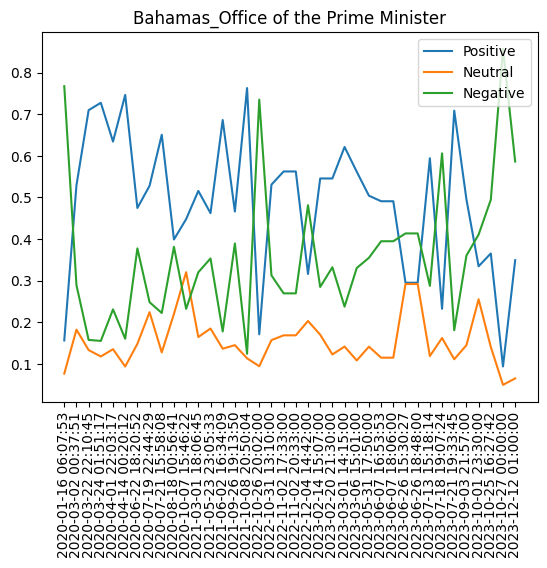

In [ ]:
df = matches_df.sort_values('Date Published', ascending=True)
plt.plot(df['Date Published'], df['Positive Sentiment Average'], label="Positive")
plt.plot(df['Date Published'], df['Neutral Sentiment Average'], label="Neutral")
plt.plot(df['Date Published'], df['Negative Sentiment Average'], label="Negative")
plt.legend()
plt.title("Bahamas_Office of the Prime Minister")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
for key in keywords:
  print(key+" "+str(matches_df.MainText[1].count(key)))


migration 0
immigrant 0
immigration 0
migrant 0
expat 0
asylum 0
refugee 0
returnee 0
Migration 2
Immigrant 0
Immigration 0
Migrant 0
Expat 0
Asylum 0
Refugee 0
Returnee 0


In [ ]:
countries=["Bahamas","Barbados","Guyana","Jamaica","Trinidad y Tobago"]
for country in countries:
  !zip -r '/content/{country}_WordCloud_After.zip' '/content/{country}_WordCloud_After'
  files.download(f"/content/{country}_WordCloud_After.zip")

##Individual for Emotion

In [ ]:
dataset=pd.read_csv('/content/Articles/Trinidad y Tobago_United National Congress speeches_Article.csv')
filebot='Trinidad y Tobago_United National Congress speeches_Article'
# country=dta.split("_")[0]
# filebot=dta.split(".")[0]
dataset.rename(columns={'Main Text': 'MainText'}, inplace=True)
keywords = ["migration","immigrant","immigration","migrant","expat","asylum","refugee","returnee","Migration","Immigrant","Immigration","Migrant","Expat","Asylum","Refugee","Returnee"]
dataset.dropna(subset=["MainText"], inplace=True)
matches_df = dataset[dataset.MainText.apply(lambda x: any(k for k in keywords if k in x))].copy()

# if not os.path.exists(f'/content/{country}_Sentiments'):
#   !mkdir '{country}_Sentiments'



pos=[]
neut=[]
neg=[]
sents=[]
for i in range(len(matches_df)):
  # print(i)
  text=matches_df.iloc[i]['MainText']
  sentences=[sentence + '.' for sentence in text.split('.') if any(k for k in keywords if k in sentence)]
  # print(sentences)
  # for line in sentences:
  #   distilled_student_sentiment_classifier(line)
  sentiment=distilled_student_sentiment_classifier(sentences)
  sents.append(sentiment)
  pos.append(average([list[0]['score'] for list in sentiment]))
  neut.append(average([list[1]['score'] for list in sentiment]))
  neg.append(average([list[2]['score'] for list in sentiment]))
matches_df['Sentiment']=sents
matches_df['Positive Sentiment Average']=pos
matches_df['Neutral Sentiment Average']=neut
matches_df['Negative Sentiment Average']=neg
#if values in Date Published does not contain N/A
df = matches_df.sort_values('Date Published', ascending=True)
# try:
# plt.plot(df['Date Published'], df['Positive Sentiment Average'], label="Positive")
# plt.plot(df['Date Published'], df['Neutral Sentiment Average'], label="Neutral")
# plt.plot(df['Date Published'], df['Negative Sentiment Average'], label="Negative")
# except:

# dfbar=(df[['Title','Positive Sentiment Average','Neutral Sentiment Average','Negative Sentiment Average']])
# dfbar.set_index('Title').plot.bar()

# plt.legend()
# plt.title(filebot)
# plt.xticks(rotation='vertical')
# plt.savefig(f'/content/{filebot}.png')
# #   # matches_df.to_csv(f'{filebot}_Sentiments.csv',sep=",",quotechar='"',index=False,quoting=csv.QUOTE_ALL)
# files.download(f'/content/{filebot}.png')

In [ ]:
classifier(sentences[0])

[{'label': 'neutral', 'score': 0.9667923450469971}]

Intro, overview of data, country pdf file format, migration words, sentence looked at only
present the data by country

in country section, include examples of sentence